<a href="https://colab.research.google.com/github/SpreeC/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
  - Cheyenne Cantwell

##Project Overview

##Load and Inspect Data

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Save the filepath and load the data as "df"
fname = '/content/drive/MyDrive/Coding Dojo/01-Fundementals/sales_predictions_2023.csv'
df = pd.read_csv(fname)

In [6]:
#preview first rows of data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
#preview summary of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

######1) How many rows and columns?

In [8]:
#rows and columns
df.shape

(8523, 12)

######2) What are the datatypes of each variable?

In [9]:
#datatypes of column names
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
# Use .select_dtypes to view only object columns to see if any objects need to be converted to numbers
df.select_dtypes('O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


######3) Are there duplicates? If so, drop any duplicates.

In [11]:
#find duplicates
df.duplicated().sum()

0

######4) Identify missing values.

In [12]:
#find missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

######5) Address the missing values by using a placeholder value.

In [13]:
# save list of categorical column name
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
# use the list of cat columns to fill null values with MISSING
df[cat_cols] = df[cat_cols].fillna('MISSING')
df[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [15]:
# save list of numeric column names
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
# use the list of num columns to fill null values with -1
df[num_cols] = df[num_cols].fillna(-1)
df[num_cols].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

######6) Confirm that there are no missing values after addressing them.

In [17]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

######7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [18]:
# find inconsistencies in categories
for col in cat_cols:
  print(f'Value counts for {col}:')
  print(df[col].value_counts())
  print('\n')

Value counts for Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    

In [19]:
#replace low fat with Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5201
Regular    2889
LF          316
reg         117
Name: Item_Fat_Content, dtype: int64

In [20]:
#replace LF with Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [21]:
#replace reg with Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

######8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [22]:
#obtain min, max, and mean for numerical columns
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

####Create a Countplot to view the frequency of each class of categorial features in the dataset.

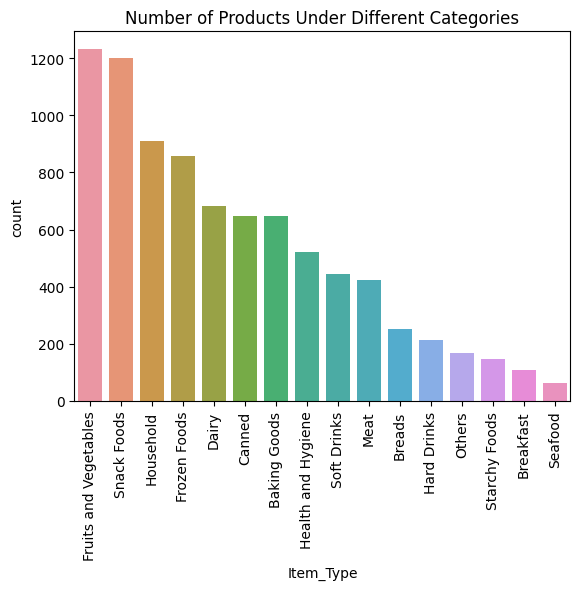

In [23]:
#Define the label order
label_order = df['Item_Type'].value_counts().index
#create a countplot with x='Item_Type' and order it
ax = sns.countplot(data=df, x="Item_Type", order=label_order)
#fix rotation of item types
ax.tick_params(axis='x', rotation = 90);
#set the title
ax.set_title('Number of Products Under Different Categories');

#####Through this visualization we can see that fruits and vegetables have the most amount of different products sold while seafood has the least amount of different products sold

####Create a Histogram to view the distributions of numerical features in the dataset.

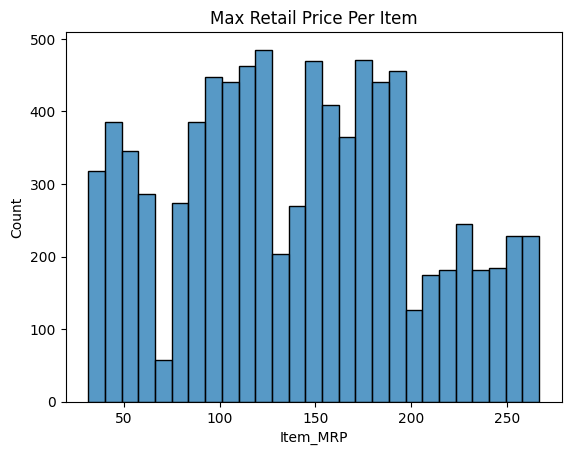

In [26]:
#create a Histogram with x='Item_MRP'
ax=sns.histplot(data=df, x='Item_MRP')
#title the histogram
ax.set_title('Max Retail Price Per Item');

#####Through this visualization we can see that the max retail price per item does not exceed $300

####Create a Barplot to compare a numerical value to a categorical value

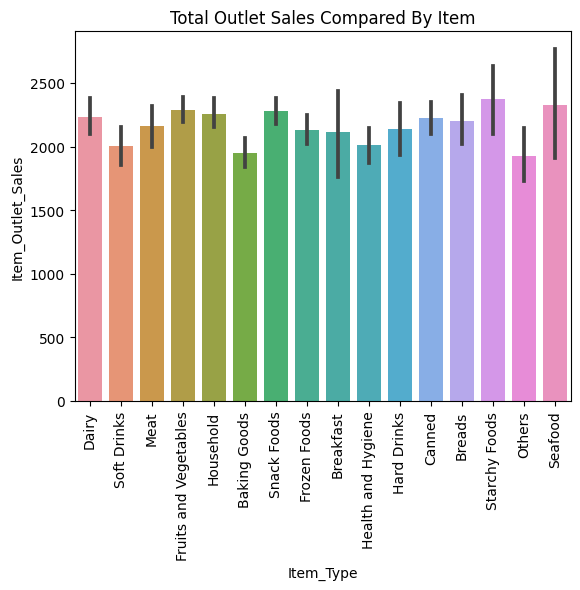

In [27]:
#create a Barplot with x='Item_Type', y='Item_Outlet_Sales'
ax=sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
#fix rotation
ax.tick_params(axis='x', rotation = 90);
#set title
ax.set_title('Total Outlet Sales Compared By Item');

#####Through this visualization we can see (without looking at the error bars) that Starchy Foods have the most sales while Others have the least

####Creat a Boxplot to view a statistical summary of a numerical feature in the dataset.

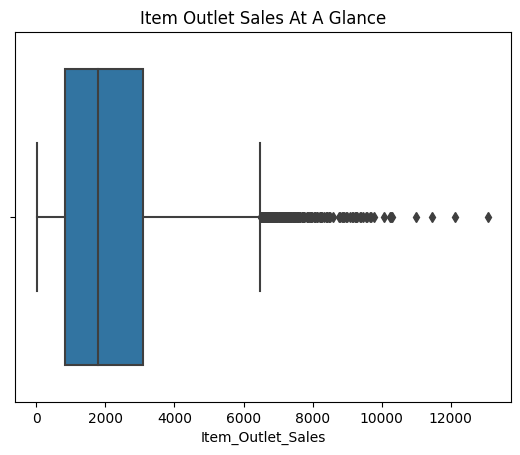

In [34]:
#create a boxplot with x='Item_Outlet_Sales'
ax=sns.boxplot(data=df, x='Item_Outlet_Sales')
#set title
ax.set_title('Item Outlet Sales At A Glance');

#####Through this visualization we can see that the median outlet sales falls just below 2000, but we have many outliers including a couple that go over 12,000

####Create a Heatmap to view the correlation between features.

In [29]:
#Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


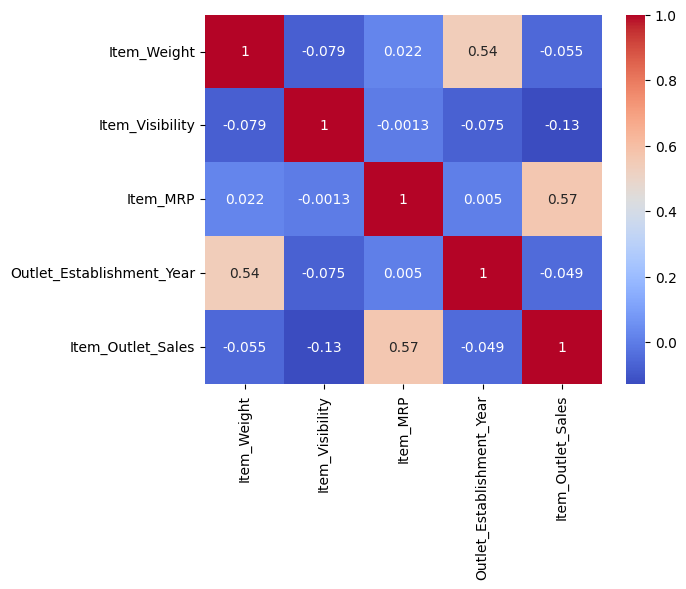

In [30]:
#create a Heatmap with coolwarm colors
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

#####Through this visualization we can see that Item_MRP and Item_Outlet_Sales have a positive correlation; and Item_Visibility and Item_Outlet_Sales have a negative correlation

####Create an scatterplot to view the correlation between two features

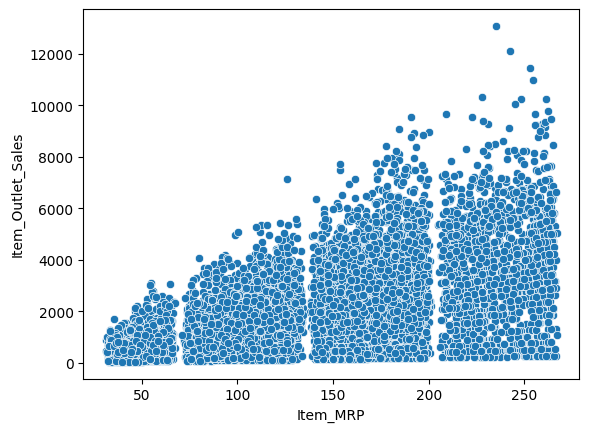

In [33]:
#create an scatterplot with x='Item_MRP', y='Item_Outlet_Sales'
ax=sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')

#####This visualization gives us more detail into the positive correlation of Item_MRP and Item_Outlet_Sales

##Feature Inspection